In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
def last_modified_dir(path):
    dir_content = [(f, f.stat().st_mtime) for f in path.iterdir()]
    dir_content = sorted(dir_content, key=lambda t: t[1], reverse=True)
    
    dir_path, _ = dir_content[0]
    return dir_path

In [56]:
cache_dir = Path('../cache')
datasets_dir = Path('../datasets')
last_cache_dir = last_modified_dir(cache_dir)

filename = last_cache_dir / f'epoch_0.pkl.gzip'
data = pd.read_pickle(filename)
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [57]:
# detect negative timestamp deltas
track_durations = (data['timestamp'].diff().dt.total_seconds() / 60).values[1:]
neg_dur = np.argwhere(track_durations < 0)
pairs = np.hstack((neg_dur-2, neg_dur+3))

for fr, to in pairs:
    print(data.iloc[fr: to])

In [58]:
data.head(20)

,timestamp,user_id,item_id,relevance_cont,relevance_int,terminate,best_from_env,rating
0,2019-03-23 09:05:03,78,52,0.589400,4,False,"[99, 73, 13, 78, 34, 52, 16, 33, 18, 82]",4
1,2019-03-23 09:08:04,78,55,0.776791,4,False,"[23, 50, 62, 33, 69, 58, 43, 73, 56, 55]",4
2,2019-03-23 09:11:38,78,58,0.844688,5,False,"[71, 33, 73, 19, 23, 26, 29, 58, 56, 80]",5
3,2019-03-23 09:15:10,78,19,0.881847,5,False,"[0, 81, 78, 77, 52, 73, 18, 19, 29, 55]",5
4,2019-03-23 09:18:16,78,73,0.664118,4,False,"[69, 70, 78, 98, 50, 29, 52, 73, 18, 19]",4
5,2019-03-23 09:22:16,78,43,0.701322,5,False,"[0, 80, 32, 33, 34, 24, 23, 43, 21, 58]",5
6,2019-03-23 09:25:35,78,40,0.914694,5,False,"[70, 52, 61, 66, 23, 40, 58, 57, 73, 18]",5
7,2019-03-23 09:27:46,78,55,0.687550,4,False,"[99, 55, 73, 66, 23, 62, 26, 58, 56, 29]",4
8,2019-03-23 09:31:33,78,57,0.842306,5,False,"[70, 52, 23, 22, 58, 73, 19, 18, 57, 56]",5
9,2019-03-23 09:34:54,78,40,0.655241,4,False,"[99, 33, 29, 23, 40, 58, 19, 18, 57, 56]",4


In [59]:
def get_episodes(data):
    ends = data[data['terminate'] == True].index.values
    starts = np.zeros_like(ends)
    starts[1:] = ends[:-1] + 1
    episodes = pd.DataFrame(starts, columns=['start'])
    episodes['end'] = ends
    episodes['start_time'] = data.iloc[starts]['timestamp'].values
    episodes['end_time'] = data.iloc[ends]['timestamp'].values
    episodes['duration_min'] = (episodes['end_time'] - episodes['start_time']).dt.total_seconds() / 60
    return episodes

get_episodes(data).head(10)

,start,end,start_time,end_time,duration_min
0,0,27,2019-03-23 09:05:03,2019-03-23 10:31:08,86.083333
1,28,39,2019-03-23 19:24:07,2019-03-23 19:54:50,30.716667
2,40,56,2019-03-24 03:48:46,2019-03-24 04:38:09,49.383333
3,57,84,2019-03-24 12:19:47,2019-03-24 13:42:30,82.716667
4,85,97,2019-03-24 20:38:23,2019-03-24 21:16:27,38.066667
5,98,107,2019-03-25 00:56:44,2019-03-25 01:25:41,28.950000
6,108,138,2019-03-25 05:28:06,2019-03-25 07:02:02,93.933333
7,139,156,2019-03-25 10:59:06,2019-03-25 11:54:23,55.283333
8,157,196,2019-03-25 12:54:47,2019-03-25 14:53:41,118.900000
9,197,236,2019-03-25 22:29:14,2019-03-26 00:33:29,124.250000


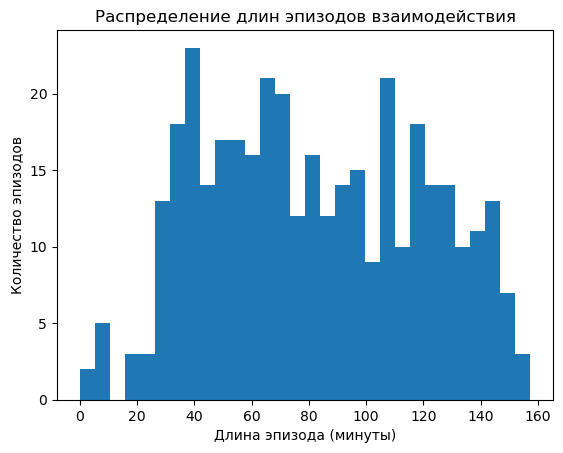

In [60]:
def plot_interaction_lengths(data, ax=None):
    # Построение графика распределения длин эпизодов взаимодействия
    episodes = get_episodes(data)

    if ax is None:
        ax = plt.subplot(1,1,1)
    ax.hist(episodes['duration_min'], bins=30)
    ax.set_title('Распределение длин эпизодов взаимодействия')
    ax.set_xlabel('Длина эпизода (минуты)')
    ax.set_ylabel('Количество эпизодов')


plot_interaction_lengths(data)

In [61]:
def plot_interactions_per_episode(data, ax=None):
    # Построение гистограммы распределения количества взаимодействий за эпизод
    episodes = get_episodes(data)
    if ax is None:
        ax = plt.subplot(1,1,1)
    ax.hist(episodes['end'] - episodes['start'] + 1, bins=30)
    ax.set_title('Распределение количества взаимодействий за эпизод')
    ax.set_xlabel('Количество взаимодействий за эпизод')
    ax.set_ylabel('Количество эпизодов')

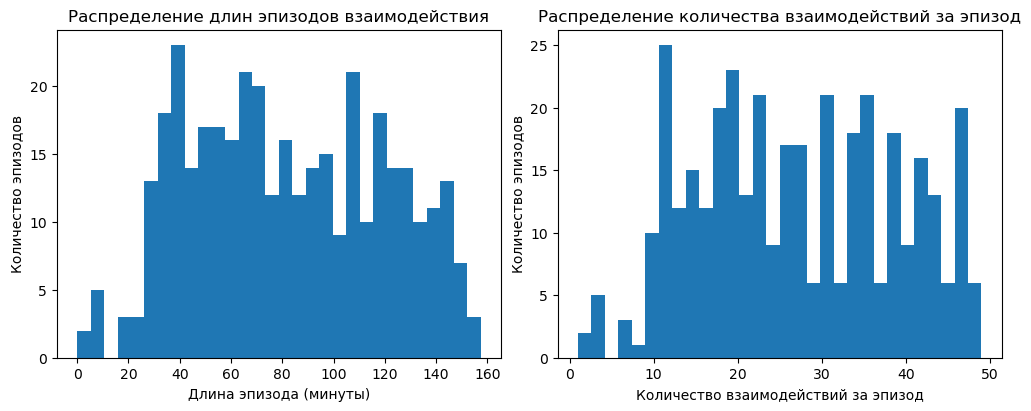

In [62]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4), layout="constrained")

plot_interaction_lengths(data, axs[0])
plot_interactions_per_episode(data, axs[1])

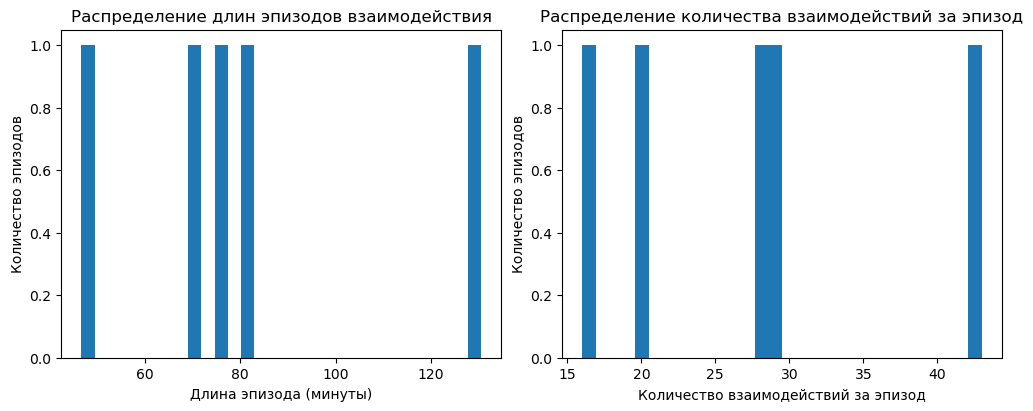

In [63]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4), layout="constrained")

user_0 = data[data['user_id'] == 6].copy()
user_0.reset_index(inplace=True)

plot_interaction_lengths(user_0, axs[0])
plot_interactions_per_episode(user_0, axs[1])

In [64]:
def plot_relevance_distribution(data, discr=True, user_id=None, ax=None):
    if user_id is not None:
        # Фильтрация данных для заданного пользователя
        data = data[data['user_id'] == user_id]
    
    if ax is None:
        ax = plt.subplot(1,1,1)
    
    col = 'relevance_int' if discr else 'relevance_cont'
        
    # Построение гистограммы распределения relevance_int
    ax.hist(data[col].dropna(), bins=30)
    ax.set_title(f'Распределение {col} для пользователя {user_id}')
    ax.set_xlabel(col)
    ax.set_ylabel('Количество')


def plot_item_distribution(data, user_id=None, rel=None, ax=None):
    if user_id is not None:
        # Фильтрация данных для заданного пользователя
        data = data[data['user_id'] == user_id]
    if rel is not None:
        data = data[data['relevance_int'] > rel]

    if ax is None:
        ax = plt.subplot(1,1,1)
        
    # Построение гистограммы распределения item_idx
    ax.hist(data['item_id'].dropna(), bins=30)
    ax.set_title('Распределение item_idx для пользователя {}'.format(user_id))
    ax.set_xlabel('item_id')
    ax.set_ylabel('Количество')

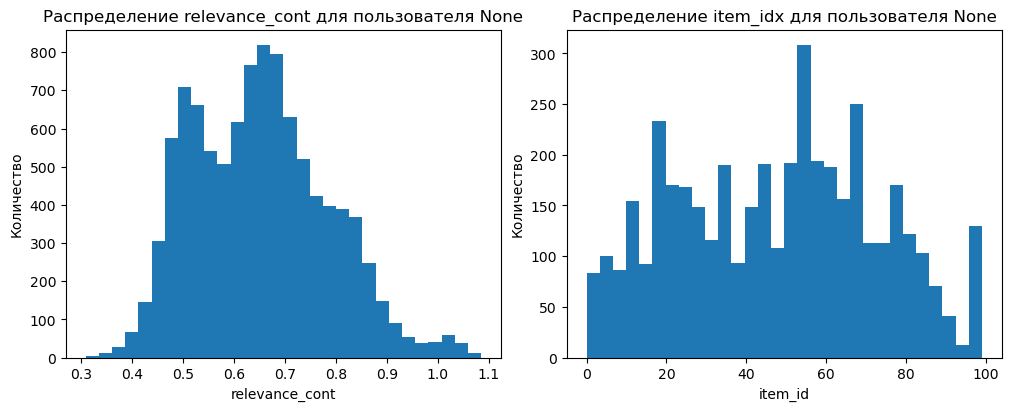

In [65]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4), layout="constrained")

# set None to see for all users
user_id = None
plot_relevance_distribution(data, discr=False, user_id=user_id, ax=axs[0])  # Добавлен вызов новой функции
plot_item_distribution(data, user_id=user_id, rel=4, ax=axs[1])  # Добавлен вызов новой функции

In [54]:
user = data[data['user_id'] == 0]
user

,timestamp,user_id,item_id,relevance_cont,relevance_int,terminate,best_from_env,rating
547,2019-03-29 08:36:01,0,14,1.016245,5,False,"[99, 87, 7, 14, 22, 23, 47, 72, 0, 90]",5
548,2019-03-29 08:39:24,0,22,0.909865,5,False,"[99, 87, 14, 22, 30, 41, 47, 58, 60, 0]",5
549,2019-03-29 08:42:28,0,87,0.890959,5,False,"[99, 87, 14, 17, 22, 47, 58, 60, 72, 78]",5
550,2019-03-29 08:45:44,0,0,0.900868,5,False,"[99, 90, 7, 14, 22, 47, 60, 72, 87, 0]",5
551,2019-03-29 08:49:34,0,22,1.004300,5,False,"[99, 22, 60, 72, 47, 76, 28, 87, 67, 14]",5
552,2019-03-29 08:52:09,0,99,0.883963,5,False,"[99, 87, 7, 14, 22, 47, 60, 72, 0, 90]",5
553,2019-03-29 08:55:38,0,90,0.870161,5,False,"[99, 87, 14, 20, 22, 47, 60, 72, 0, 90]",5
554,2019-03-29 08:59:41,0,60,0.561044,5,False,"[99, 88, 14, 22, 47, 60, 72, 78, 87, 0]",5
555,2019-03-29 09:03:01,0,87,0.816221,5,False,"[0, 14, 47, 28, 87, 81, 74, 22, 93, 72]",5
556,2019-03-29 09:06:03,0,0,0.862500,5,False,"[99, 87, 1, 14, 22, 72, 74, 0, 91, 64]",5


In [238]:
def save_dict_as_yaml_config(config_dict, file_name):
    from ruamel import yaml
    with open(f"{file_path}", "w") as file:
        yaml = yaml.YAML()
        yaml.indent(sequence=4, offset=2)
        yaml.dump(config_dict, file)
        
my_dict = {'name': 'eval_on_cases',
 'group_name': 'DCQL_pure_best',
 'seed': 42,
 'use_wandb': True,
 'eval_online': True,
 'env_path': 'environments/env_random',
 'looking_for': '0,1,5',
 'experiment': {'top_k': 10,
  'data_path': 'environments/env_best/train_data.csv',
  'test_data_path': 'environments/env_best/test_data.csv',
  'col_mapping': {'user_col_name': 'user_idx',
   'item_col_name': 'item_idx',
   'reward_col_name': 'relevance_int',
   'timestamp_col_name': 'timestamp'},
  'mdp_settings': {'framestack_size': 10,
   'reward_function_name': 'relevance_based_reward',
   'action_function_name': 'next_item_action',
   'episode_splitter_name': 'full_user_interaction',
   'history_keys': ['framestack', 'user_id']},
  'scorer': {'metrics': ['ndcg', 'PC', 'ihitrate', 'stat_hitrate'],
   'tresh': '[0.5, 0.7]',
   'prediction_type': 'discrete'},
  'algo_settings': {'n_epochs': 300,
   'general_parametrs': {'algo': 'DCQL', 'batch_size': 1024, 'use_gpu': False},
   'model_parametrs': {'use_als': False,
    'user_num': 100,
    'item_num': 100,
    'emb_dim': 5,
    'hid_dim': 256,
    'memory_size': 10,
    'feature_size': 512,
    'state_repr_name': 'full_history',
    'freeze_emb': False,
    'attention_hidden_size': 32}}}}

# save_dict_as_yaml_config('_config.yaml', my_dict)